In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("Read CSV") \
    .getOrCreate()

# Read CSV file into a DataFrame
df = spark.read.load('hdfs://localhost:9000/user1/en_coronavirus_03_04_2020_thru_03_27_2020.csv',format='csv', header=True)


24/03/25 22:56:22 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [2]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [3]:
# Show the DataFrame
df.show()

+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+------------------+--------+----------+-------------+
|             user_id|           status_id|          status_url|          created_at|  screen_name|                text|            source|is_quote|is_retweet|retweet_count|
+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+------------------+--------+----------+-------------+
|  750502701457440768| 1235354334923276289|https://twitter.c...|2020-03-04T23:59:59Z|RocketMan6510|Here are the 6 co...|              null|    null|      null|         null|
|1. Health care wo...|                null|                null|                null|         null|                null|              null|    null|      null|         null|
|2. Westchester at...|                null|                null|                null|         null|                null|          

In [4]:
# Count the number of rows
row_count = df.count()

# Get the list of column names and count the number of columns
column_count = len(df.columns)

print("Number of rows:", row_count)
print("Number of columns:", column_count)


Number of rows: 671515
Number of columns: 10


In [5]:
# Display the schema
df.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- status_id: string (nullable = true)
 |-- status_url: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- screen_name: string (nullable = true)
 |-- text: string (nullable = true)
 |-- source: string (nullable = true)
 |-- is_quote: string (nullable = true)
 |-- is_retweet: string (nullable = true)
 |-- retweet_count: string (nullable = true)



In [6]:
# Display the summary stastics
df.describe().show()

24/03/25 22:57:05 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+--------------------+--------------------+--------------------+------------------+-----------+--------------------+--------------------+--------------------+-----------------+--------------------+
|summary|             user_id|           status_id|          status_url|        created_at|screen_name|                text|              source|            is_quote|       is_retweet|       retweet_count|
+-------+--------------------+--------------------+--------------------+------------------+-----------+--------------------+--------------------+--------------------+-----------------+--------------------+
|  count|              671508|              494948|              463761|            457582|     456004|              321452|              164017|              158709|           157191|              156605|
|   mean|3.319423476913961...|1.218941021433981...|   368.7757255936676|1185.4778761061948|   Infinity|   8048.884650235593|  1542.7500769467529|  4367.4402597402595|1976.40517

In [7]:
from pyspark.sql.functions import length

# Cast 'text' column to StringType
df_text = df.withColumn("text", df["text"].cast("string"))
df_text.show()

+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+------------------+--------+----------+-------------+
|             user_id|           status_id|          status_url|          created_at|  screen_name|                text|            source|is_quote|is_retweet|retweet_count|
+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+------------------+--------+----------+-------------+
|  750502701457440768| 1235354334923276289|https://twitter.c...|2020-03-04T23:59:59Z|RocketMan6510|Here are the 6 co...|              null|    null|      null|         null|
|1. Health care wo...|                null|                null|                null|         null|                null|              null|    null|      null|         null|
|2. Westchester at...|                null|                null|                null|         null|                null|          

In [8]:
# Grouping the data and the count
from pyspark.sql.functions import collect_list

# Group by 'source' column 
grouped_df = df.groupBy('source').count().show()
grouped_df

+--------------------+-----+
|              source|count|
+--------------------+-----+
|"" says @SenTedCr...|    3|
|           GaggleAMP|    8|
| etc. https://t.c...|    1|
| lax labor laws a...|    2|
|        Tabtter Free|    4|
| the threat of a ...|   29|
| I never imagined...|    1|
| including aged g...|    1|
| later developed ...|    2|
| returned with #C...|    1|
| said a city gove...|    1|
|                2162|   25|
|"" promising to n...|    1|
|MonkeyViral Auto ...|    7|
| if there’s a mes...|    5|
|                 125|    1|
| we’re all in thi...|    4|
| I replied Philip...|    1|
| it's Taiwan. I'v...|    1|
|                ""No|    1|
+--------------------+-----+
only showing top 20 rows



In [9]:
#Grouping the data and aggregating
grouped_df2 = df.groupBy('source').agg({'is_retweet':'avg'})
grouped_df2.show()

+--------------------+---------------+
|              source|avg(is_retweet)|
+--------------------+---------------+
|"" says @SenTedCr...|           null|
|           GaggleAMP|           null|
| etc. https://t.c...|           null|
| lax labor laws a...|           null|
|        Tabtter Free|           null|
| the threat of a ...|           null|
| I never imagined...|           null|
| including aged g...|           null|
| later developed ...|           null|
| returned with #C...|           null|
| said a city gove...|           null|
|                2162|           null|
|"" promising to n...|           null|
|MonkeyViral Auto ...|           null|
| if there’s a mes...|           null|
|                 125|           null|
| we’re all in thi...|           null|
| I replied Philip...|           null|
| it's Taiwan. I'v...|           null|
|                ""No|           null|
+--------------------+---------------+
only showing top 20 rows



In [10]:
# Identify missing values in the DataFrame
missing_values_df = df.select([df['text'].isNull().alias('text') for column in df.columns])

# Show the DataFrame with missing values
missing_values_df.show()

+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
| text| text| text| text| text| text| text| text| text| text|
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|false|false|false|false|false|false|false|false|false|false|
| true| true| true| true| true| true| true| true| true| true|
| true| true| true| true| true| true| true| true| true| true|
| true| true| true| true| true| true| true| true| true| true|
| true| true| true| true| true| true| true| true| true| true|
| true| true| true| true| true| true| true| true| true| true|
| true| true| true| true| true| true| true| true| true| true|
|false|false|false|false|false|false|false|false|false|false|
|false|false|false|false|false|false|false|false|false|false|
| true| true| true| true| true| true| true| true| true| true|
|false|false|false|false|false|false|false|false|false|false|
| true| true| true| true| true| true| true| true| true| true|
|false|false|false|false|false|false|false|false|false|false|
| true| 

In [11]:
# Extract features from timestamps
from pyspark.sql.functions import year, month, dayofmonth

# Select only the extracted features without modifying the original DataFrame
extracted_features_df = df.select(year(df['created_at']).alias('year'),
                                  month(df['created_at']).alias('month'),
                                  dayofmonth(df['created_at']).alias('day'))

# Display the extracted features
extracted_features_df.show()

+----+-----+----+
|year|month| day|
+----+-----+----+
|2020|    3|   4|
|null| null|null|
|null| null|null|
|null| null|null|
|null| null|null|
|null| null|null|
|null| null|null|
|2020|    3|   4|
|2020|    3|   4|
|null| null|null|
|2020|    3|   4|
|null| null|null|
|2020|    3|   4|
|null| null|null|
|null| null|null|
|null| null|null|
|null| null|null|
|null| null|null|
|2020|    3|   4|
|null| null|null|
+----+-----+----+
only showing top 20 rows



In [12]:
from pyspark.sql import functions as F

# List of columns in your DataFrame
columns_to_aggregate = ['user_id', 'status_id', 'status_url', 'created_at', 'screen_name', 'text', 'source', 'is_quote', 'is_retweet', 'retweet_count']

# Iterate over each column for aggregation
for col in columns_to_aggregate:
    print(f" *** Aggregation for {col} ***")
    df.groupBy(col).count().orderBy(F.col('count').desc()).show(truncate=False)

 *** Aggregation for user_id ***


+----------------------------------------------------------------------------------------------------------------------------+-----+
|user_id                                                                                                                     |count|
+----------------------------------------------------------------------------------------------------------------------------+-----+
|#coronavirus"                                                                                                               |2998 |
|#coronavirus                                                                                                                |2063 |
|#coronavirus #DontBeASpreader https://t.co/Hqhc4fFXbe"                                                                      |1544 |
|#coronavirus                                                                                                                |1241 |
|@thespybrief                                                        

+----------------------------------------------------------------------------------------------------------+------+
|status_id                                                                                                 |count |
+----------------------------------------------------------------------------------------------------------+------+
|null                                                                                                      |176567|
|Twitter for iPhone                                                                                        |49344 |
|Twitter for Android                                                                                       |41677 |
|Twitter Web App                                                                                           |28802 |
|Twitter for iPad                                                                                          |8031  |
|TweetDeck                                                              

+--------------------------------------------------------------------------------------------------------------------------------------------+------+
|status_url                                                                                                                                  |count |
+--------------------------------------------------------------------------------------------------------------------------------------------+------+
|null                                                                                                                                        |207754|
|FALSE                                                                                                                                       |131545|
|Twitter for iPhone                                                                                                                          |4367  |
|Twitter for Android                                                                                

+---------------------------------------------------+------+
|created_at                                         |count |
+---------------------------------------------------+------+
|null                                               |213933|
|TRUE                                               |115212|
|FALSE                                              |29632 |
|Twitter for iPhone                                 |1285  |
|Twitter for Android                                |1081  |
|Twitter Web App                                    |593   |
| why did they build *two 1                         |244   |
| like he's done to prevent the spread of #COVID19."|179   |
|Twitter for iPad                                   |170   |
| working parents                                   |144   |
| only of 46 were tested.                           |121   |
| have died""-@DrTedros #COVID19 #coronavirus"      |80    |
| and support for food stamps &amp; unemployment.   |58    |
| neighbours.. https://t

+-----------+------+
|screen_name|count |
+-----------+------+
|null       |215511|
|0          |12741 |
|TRUE       |10056 |
|1          |5332  |
|FALSE      |4177  |
|2          |3366  |
|3          |2442  |
|4          |1960  |
|5          |1702  |
|6          |1380  |
|190166     |1161  |
|8          |1150  |
|7          |1138  |
|10         |957   |
|9          |885   |
|12         |773   |
|11         |770   |
|13         |729   |
|14         |711   |
|16         |599   |
+-----------+------+
only showing top 20 rows

 *** Aggregation for text ***


+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------+
|text                                                                                                                                                                                                                                                                                                            |count |
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------+
|null                                                     

+----------------------------------------+------+
|source                                  |count |
+----------------------------------------+------+
|null                                    |507498|
|Twitter for iPhone                      |65180 |
|Twitter for Android                     |41683 |
|Twitter Web App                         |28857 |
|Twitter for iPad                        |8259  |
|Twitter Web Client                      |1992  |
|TweetDeck                               |1790  |
|TRUE                                    |693   |
|Hootsuite Inc.                          |540   |
|Instagram                               |518   |
|FALSE                                   |401   |
| I don't call"" https://t.co/PnKXNAQFzC"|384   |
|Buffer                                  |338   |
|Tweetbot for iΟS                        |332   |
|dlvr.it                                 |211   |
| politicians are reassuring             |195   |
|0                                       |179   |


+------------------------------------------------------------------------------------------------------------------+------+
|is_quote                                                                                                          |count |
+------------------------------------------------------------------------------------------------------------------+------+
|null                                                                                                              |512806|
|FALSE                                                                                                             |148423|
|TRUE                                                                                                              |4595  |
|Twitter for iPhone                                                                                                |746   |
|Twitter for Android                                                                                               |599   |
|Twitter

+-----------------------------------------------------------------------+------+
|is_retweet                                                             |count |
+-----------------------------------------------------------------------+------+
|null                                                                   |514324|
|TRUE                                                                   |119619|
|FALSE                                                                  |35079 |
|Twitter for iPhone                                                     |377   |
|Twitter for Android                                                    |315   |
|Twitter Web App                                                        |299   |
|4264                                                                   |143   |
| directly addressing children during his Sunday update on #coronavirus.|77    |
|Twitter for iPad                                                       |66    |
| or unjustified acceptance 

+-------------+------+
|retweet_count|count |
+-------------+------+
|null         |514910|
|0            |25274 |
|1            |7929  |
|2            |4363  |
|3            |3017  |
|4            |2357  |
|5            |1831  |
|TRUE         |1728  |
|6            |1717  |
|FALSE        |1400  |
|7            |1280  |
|8            |1257  |
|9            |1129  |
|11           |934   |
|10           |925   |
|12           |852   |
|14           |832   |
|13           |799   |
|60797        |764   |
|101721       |729   |
+-------------+------+
only showing top 20 rows



In [13]:
# Filter tweets with more than 100 retweets
filtered_df2 = df.filter(df['retweet_count'] > 100)
filtered_df2.show()

+-------------------+-------------------+--------------------+--------------------+--------------+--------------------+-------------------+--------+----------+-------------+
|            user_id|          status_id|          status_url|          created_at|   screen_name|                text|             source|is_quote|is_retweet|retweet_count|
+-------------------+-------------------+--------------------+--------------------+--------------+--------------------+-------------------+--------+----------+-------------+
|         1694554160|1235354333602107393|https://twitter.c...|2020-03-04T23:59:59Z| mariomoraes51|Find out how #ICT...| Twitter for iPhone|   FALSE|      TRUE|          422|
| 742773886270476288|1235352880485294080|https://twitter.c...|2020-03-04T23:54:13Z|NotAnotherPoll|Good news — I jus...|    Twitter Web App|   FALSE|      TRUE|         1676|
|            8132402|1235354330275827712|https://twitter.c...|2020-03-04T23:59:58Z| michaelturton|Just spoke with E...|    Twitter

In [14]:
# Filter tweets that are retweets
filtered_df3 = df.filter(df['is_retweet'] == True)
filtered_df3.show()

+-------------------+-------------------+--------------------+--------------------+--------------+--------------------+-------------------+--------+----------+-------------+
|            user_id|          status_id|          status_url|          created_at|   screen_name|                text|             source|is_quote|is_retweet|retweet_count|
+-------------------+-------------------+--------------------+--------------------+--------------+--------------------+-------------------+--------+----------+-------------+
|         1694554160|1235354333602107393|https://twitter.c...|2020-03-04T23:59:59Z| mariomoraes51|Find out how #ICT...| Twitter for iPhone|   FALSE|      TRUE|          422|
| 742773886270476288|1235352880485294080|https://twitter.c...|2020-03-04T23:54:13Z|NotAnotherPoll|Good news — I jus...|    Twitter Web App|   FALSE|      TRUE|         1676|
|           24959025|1235354331718664193|https://twitter.c...|2020-03-04T23:59:59Z|bakersfieldnow|Tune in tonight a...|    Twitter

In [15]:
# Sort tweets by retweet count in descending order
sorted_df = df.orderBy(df['retweet_count'].desc())
sorted_df.show(5)

+------------------+-------------------+--------------------+--------------------+-----------+--------------------+--------------------+--------+--------------------+--------------------+
|           user_id|          status_id|          status_url|          created_at|screen_name|                text|              source|is_quote|          is_retweet|       retweet_count|
+------------------+-------------------+--------------------+--------------------+-----------+--------------------+--------------------+--------+--------------------+--------------------+
|         388195837|1236799237989584896|https://twitter.c...|2020-03-08T23:41:31Z| samadbeygi|"Richard Brennan ...|               gowns|  gloves| &amp; bc there'r...|they also need mo...|
|         221795726|1238614814706016271|https://twitter.c...|2020-03-13T23:55:58Z|   paolorho|"@BorisJohnson Si...| has to get coron...| at best| with a mortality...|at least 400.000 ...|
|                WI|                 MN|                  KY

In [16]:
# Sort tweets by creation time in ascending order
sorted_df2 = df.orderBy('created_at')
sorted_df2.show(5)

+--------------------+---------+----------+----------+-----------+----+------+--------+----------+-------------+
|             user_id|status_id|status_url|created_at|screen_name|text|source|is_quote|is_retweet|retweet_count|
+--------------------+---------+----------+----------+-----------+----+------+--------+----------+-------------+
|Where are the tests?|     null|      null|      null|       null|null|  null|    null|      null|         null|
| 5. Son (20 yrs old)|     null|      null|      null|       null|null|  null|    null|      null|         null|
|-The payments wil...|     null|      null|      null|       null|null|  null|    null|      null|         null|
|-Containment stil...|     null|      null|      null|       null|null|  null|    null|      null|         null|
|If the D Party wa...|     null|      null|      null|       null|null|  null|    null|      null|         null|
+--------------------+---------+----------+----------+-----------+----+------+--------+---------

In [17]:
# Pivot based on source column and aggregate on retweet count
pivot_df = df.groupBy('source').pivot('is_retweet').agg(F.count('retweet_count'))
pivot_df

DataFrame[source: string, null: bigint,   #WuhanLockDown : bigint,  "" If not every city will get hit like #NYC then this seems even more of a reason to send more ventilators to New York.  #coronavirus https://t.co/eRq0WGr9Gf": bigint,  ""In the Heights"": bigint,  ""quarantini."": bigint,  #CounterAssistants...the backlash will be immense. Your choice @BorisJohnson @MattHancock.  #WeArePharmacy #CoronaCrisis #Covid_19 #Coronavirus https://t.co/DVG21d28bt": bigint,  #ElPaso: bigint,  #Heilongjiang Province #China. Looks like they are sealing off taxies. No new cases?: bigint,  #NewStart: bigint,  #Ozzy: bigint,  #PressBriefing": bigint,  #Roseville: bigint,  #Science https://t.co/L4lBft8FZN": bigint,  #StayHomeSaveLives : bigint,  #WeLoveNurses: bigint,  #coronavirus toilet paper shortage. We went outside and had to use trees and plant leaves!!.. Dad? Yes child? What are trees?... Sorry child: bigint,  #coronavirus": bigint,  &amp; #Taiwan stands ready to share its #Coronavirus know-ho

In [18]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.cm as cm
from matplotlib import rcParams
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re
from wordcloud import WordCloud
import string
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, message="Downloading package") 

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2024-03-25 23:00:54.296539: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-25 23:00:54.429859: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-25 23:00:54.975388: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-25 23:00:57.310487: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [19]:
pandas_df = df.toPandas()
df = pandas_df

In [20]:
df.shape

(671515, 10)

In [21]:
null_counts = df.isnull().sum()
null_counts

user_id               7
status_id        176567
status_url       207754
created_at       213933
screen_name      215511
text             350063
source           507498
is_quote         512806
is_retweet       514324
retweet_count    514910
dtype: int64

In [22]:
# Fill null values with a specific value 
df_filled = df.fillna(0)
df_filled

,user_id,status_id,status_url,created_at,screen_name,text,source,is_quote,is_retweet,retweet_count
0,750502701457440768,1235354334923276289,https://twitter.com/RocketMan6510/status/12353...,2020-03-04T23:59:59Z,RocketMan6510,Here are the 6 confirmed #coronavirus cases in...,0,0,0,0
1,1. Health care worker who traveled to Iran (39...,0,0,0,0,0,0,0,0,0
2,2. Westchester attorney (50 yrs old). Hospital...,0,0,0,0,0,0,0,0,0
3,3. His wife,0,0,0,0,0,0,0,0,0
4,4. Daughter (14 yrs old),0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
671510,46988738,1243682163150618624,https://twitter.com/valadon2/status/1243682163...,2020-03-27T23:31:48Z,valadon2,'The essential thing was to save the greatest ...,0,0,0,0
671511,Albert Camus,"'The Plague' #coronavirus""",Twitter for iPad,FALSE,TRUE,16,0,0,0,0
671512,1235576604488650752,1243682163117023232,https://twitter.com/bakura_yamimode/status/124...,2020-03-27T23:31:48Z,bakura_yamimode,"Although we are not sitting together, be rest ...",0,0,0,0
671513,The novel #coronavirus does not recognise borders,thus we must rise to this challenge as nations,"united. https://t.co/vBuUJnDNnU""",Twitter for Android,FALSE,TRUE,72,0,0,0


In [23]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671515 entries, 0 to 671514
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        671508 non-null  object
 1   status_id      494948 non-null  object
 2   status_url     463761 non-null  object
 3   created_at     457582 non-null  object
 4   screen_name    456004 non-null  object
 5   text           321452 non-null  object
 6   source         164017 non-null  object
 7   is_quote       158709 non-null  object
 8   is_retweet     157191 non-null  object
 9   retweet_count  156605 non-null  object
dtypes: object(10)
memory usage: 51.2+ MB
None


In [24]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (671515, 10)


In [25]:
print("Data types of each column:")
print(df.dtypes)

Data types of each column:
user_id          object
status_id        object
status_url       object
created_at       object
screen_name      object
text             object
source           object
is_quote         object
is_retweet       object
retweet_count    object
dtype: object


In [26]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 250376


In [27]:
unwanted_columns = ['user_id', 'status_id', 'status_url', 'screen_name']
df.drop(unwanted_columns, axis=1, inplace=True)

In [28]:
df

,created_at,text,source,is_quote,is_retweet,retweet_count
0,2020-03-04T23:59:59Z,Here are the 6 confirmed #coronavirus cases in...,None,None,None,None
1,None,None,None,None,None,None
2,None,None,None,None,None,None
3,None,None,None,None,None,None
4,None,None,None,None,None,None
...,...,...,...,...,...,...
671510,2020-03-27T23:31:48Z,'The essential thing was to save the greatest ...,None,None,None,None
671511,FALSE,16,None,None,None,None
671512,2020-03-27T23:31:48Z,"Although we are not sitting together, be rest ...",None,None,None,None
671513,Twitter for Android,TRUE,72,None,None,None


In [29]:
plt.rcParams['font.family'] = 'sans-serif' 

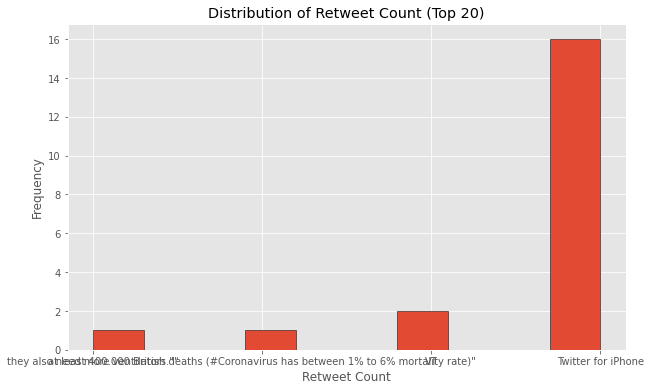

In [30]:
import matplotlib.pyplot as plt

# Sort the DataFrame by 'retweet_count' column in descending order
df_sorted = df.sort_values(by='retweet_count', ascending=False)

# Select the top 20 rows
top_20_retweets = df_sorted.head(20)

# Plot the distribution of retweet counts for the top 20
plt.figure(figsize=(10, 6))
plt.hist(top_20_retweets['retweet_count'], bins=10, edgecolor='black')
plt.title('Distribution of Retweet Count (Top 20)')
plt.xlabel('Retweet Count')
plt.ylabel('Frequency')
plt.show()


In [31]:
# Word Frequency Analysis
word_frequency = df['text'].str.split(expand=True).stack().value_counts()

In [32]:
print("Top 10 most frequent words:")
print(word_frequency.head(10))

Top 10 most frequent words:
the             261274
to              194368
#coronavirus    146580
of              130536
and             110977
in              103063
a                97244
is               83093
for              74188
are              50773
Name: count, dtype: int64


In [38]:
df.head(5)

,created_at,text,source,is_quote,is_retweet,retweet_count
0,2020-03-04T23:59:59Z,Here are the 6 confirmed #coronavirus cases in...,None,None,None,None
1,None,None,None,None,None,None
2,None,None,None,None,None,None
3,None,None,None,None,None,None
4,None,None,None,None,None,None


In [44]:
from textblob import TextBlob

# Function to perform sentiment analysis and categorize sentiment into labels
def categorize_sentiment(text):
    # Check if text is not None
    if text is not None:
        sentiment_score = TextBlob(text).sentiment.polarity

        if sentiment_score > 0.5:
            return 0  # Extreme Positive
        elif sentiment_score > 0:
            return 1  # Positive
        elif sentiment_score == 0:
            return 2  # Neutral
        elif sentiment_score >= -0.5:
            return 3  # Negative
        else:
            return 4  # Extreme Negative
    else:
        return None  # Return None for None values

# Apply sentiment analysis and categorization to each text in the DataFrame
df['sentiment_label'] = df['text'].apply(categorize_sentiment)


In [45]:
df

,created_at,text,source,is_quote,is_retweet,retweet_count,sentiment_label
0,2020-03-04T23:59:59Z,Here are the 6 confirmed #coronavirus cases in...,None,None,None,None,1.0
1,None,None,None,None,None,None,NaN
2,None,None,None,None,None,None,NaN
3,None,None,None,None,None,None,NaN
4,None,None,None,None,None,None,NaN
...,...,...,...,...,...,...,...
671510,2020-03-27T23:31:48Z,'The essential thing was to save the greatest ...,None,None,None,None,1.0
671511,FALSE,16,None,None,None,None,2.0
671512,2020-03-27T23:31:48Z,"Although we are not sitting together, be rest ...",None,None,None,None,2.0
671513,Twitter for Android,TRUE,72,None,None,None,1.0


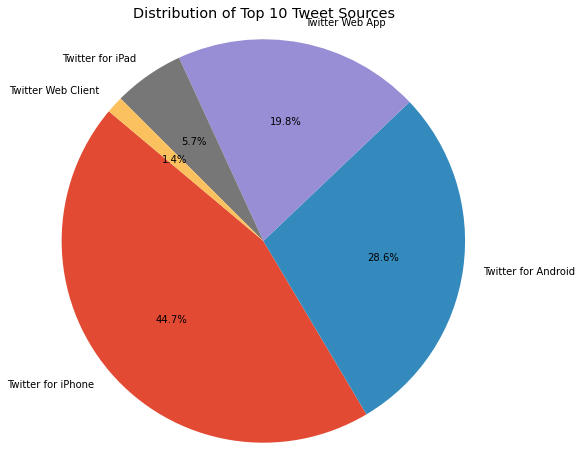

In [46]:
import matplotlib.pyplot as plt

# Calculate the frequency of each tweet source
source_counts = df['source'].value_counts()

# Select the top 5 sources
top_sources = source_counts.head(5)

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_sources, labels=top_sources.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Top 10 Tweet Sources')
plt.axis('equal')  
plt.show()

In [50]:
df=df[['text','sentiment_label']]

In [51]:
df.loc[df['sentiment_label'] == 4, 'sentiment_label'] = 1

In [52]:
df_pos = df[df['sentiment_label'] == 1]
df_neg = df[df['sentiment_label'] == 0]

In [53]:
df_pos

,text,sentiment_label
0,Here are the 6 confirmed #coronavirus cases in...,1.0
10,"Yes, #coronavirus is a big concern, but some e...",1.0
26,Good news — I just voted to pass emergency Cor...,1.0
27,BREAKING NEWS: New case being reported in LA o...,1.0
34,The new #coronavirus has killed about 3.4% of ...,1.0
...,...,...
671504,The protests are becoming violent as more poli...,1.0
671508,Open roads as a result of the #coronavirus is ...,1.0
671509,Republican Attorneys General push forward with...,1.0
671510,'The essential thing was to save the greatest ...,1.0


In [54]:
df_neg

,text,sentiment_label
75,"Being happy, laughing and listening to music i...",0.0
119,America's extraordinary success under Presiden...,0.0
284,@Uber now would be a good time to respect driv...,0.0
338,Now more than ever it’s important to stay calm...,0.0
454,"By The Lord Jesus Christ, Because Sin &amp; Wi...",0.0
...,...,...
671292,@hoosier_patrick @Amy_Siskind And yet his appr...,0.0
671293,China is the top national security threat to t...,0.0
671326,GOOD NEWS about the #coronavirus:,0.0
671338,It’s the weekend! We’d like to remind everyone...,0.0


In [55]:
df_pos = df_pos.iloc[:int(36000)]
df_neg = df_neg.iloc[:int(36000)]

In [56]:
df = pd.concat([df_pos, df_neg])

In [57]:
df['sentiment_label'] = df['sentiment_label'].astype(str).str.lower()

In [58]:
df['text'].tail()

671292    @hoosier_patrick @Amy_Siskind And yet his appr...
671293    China is the top national security threat to t...
671326                   GOOD NEWS about the #coronavirus: 
671338    It’s the weekend! We’d like to remind everyone...
671445    When we get through #coronavirus (and we will)...
Name: text, dtype: object

In [60]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/hduser/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [61]:
stopwords_list = stopwords.words('english')

In [62]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [63]:
# Function to remove stopwords
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

# Function to remove punctuation
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

# Function to remove repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

# Function to remove email addresses
def cleaning_email(data):
    return re.sub('@[^\s]+', ' ', data)

# Function to remove URLs
def cleaning_URLs(text):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', text)

# Function to remove numbers
def cleaning_numbers(df):
    return re.sub('[0-9]+', '', df)

# Function for tokenization
tokenizer = RegexpTokenizer(r'\w+')

# Function for stemming
st = nltk.PorterStemmer()
def stemming_on_text(df):
    text = [st.stem(word) for word in df]
    return df

# Function for lemmatization
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(df):
    text = [lm.lemmatize(word) for word in df]
    return df

In [65]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/hduser/nltk_data...


True

In [66]:
# Apply all the cleaning functions
df['text'] = df['text'].apply(lambda text: cleaning_stopwords(text))
df['text'] = df['text'].apply(lambda x: cleaning_punctuations(x))
df['text'] = df['text'].apply(lambda x: cleaning_repeating_char(x))
df['text'] = df['text'].apply(lambda x: cleaning_email(x))
df['text'] = df['text'].apply(lambda x: cleaning_URLs(x))
df['text'] = df['text'].apply(lambda x: cleaning_numbers(x))
df['text'] = df['text'].apply(tokenizer.tokenize)
df['text'] = df['text'].apply(lambda x: stemming_on_text(x))
df['text'] = df['text'].apply(lambda x: lemmatizer_on_text(x))


In [67]:
print(df['text'])

0          [Here, confirmed, coronavirus, cases, New, York]
10        [Yes, coronavirus, big, concern, experts, cont...
26        [God, news, I, voted, pas, emergency, Coronavi...
27        [BREAKING, NEWS, New, case, reported, LA, indi...
34        [The, new, coronavirus, kiled, confirmed, case...
                                ...                        
671292    [hosierpatrick, AmySiskind, And, yet, aproval,...
671293    [China, top, national, security, threat, Unite...
671326                             [GOD, NEWS, coronavirus]
671338    [It, s, wekend, We, d, like, remind, everyone,...
671445    [When, get, coronavirus, and, wil, we, l, cola...
Name: text, Length: 45387, dtype: object


In [68]:
X=df.text
y=df.sentiment_label

In [69]:
max_len = 500
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)


In [70]:
sequences_matrix.shape

(45387, 500)

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix, y, test_size=0.3, random_state=2)

In [73]:

Y_train = Y_train.astype(float)  
Y_train = np.round(Y_train).astype(int)  


In [74]:
Y_train = Y_train.astype(int)

In [79]:
def tensorflow_based_model(): 
    inputs = Input(name='inputs', shape=[max_len])  # step1
    layer = Embedding(2000, 50)(inputs)  # step2 (removed input_length)
    layer = LSTM(64)(layer)  # step3
    layer = Dense(256, name='FC1')(layer)  # step4
    layer = Activation('relu')(layer)  # step5
    layer = Dropout(0.5)(layer)  # step6
    layer = Dense(1, name='out_layer')(layer)  # step7
    layer = Activation('sigmoid')(layer)  # step8
    model = Model(inputs=inputs, outputs=layer)  # step9
    return model

In [80]:
model = tensorflow_based_model()
model.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

In [81]:
history=model.fit(X_train,Y_train,batch_size=80,epochs=1, validation_split=0.1)# here we are starting the training of model by feeding the training data
print('Training finished !!')

2024-03-25 23:24:31.617331: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 57186000 exceeds 10% of free system memory.


358/358 ━━━━━━━━━━━━━━━━━━━━ 153s 419ms/step - accuracy: 0.8321 - loss: 0.4175 - val_accuracy: 0.9304 - val_loss: 0.1669
Training finished !!


In [98]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Convert ground truth labels to integers
Y_test_int = Y_test.astype(float).round().astype(int)

# Predict class probabilities for test data
Y_pred_prob = model.predict(X_test)

# Convert probabilities to binary class labels
Y_pred = (Y_pred_prob > 0.5).astype(int)

# Calculate confusion matrix
cm = confusion_matrix(Y_test_int, Y_pred)

# Calculate final accuracy score
accuracy = accuracy_score(Y_test_int, Y_pred)

print("Confusion Matrix:")
print(cm)
print("\nFinal Accuracy Score:", accuracy)


426/426 ━━━━━━━━━━━━━━━━━━━━ 32s 74ms/step
Confusion Matrix:
[[ 2513   338]
 [  575 10191]]

Final Accuracy Score: 0.9329514577366527
